In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./data/gm2offline_ana.root")
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

tcomp2 = f.Get("farline").Get("wveTree")
terr2 = f.Get("farline").Get("wveNoPartnerTree")

fwave = r.TFile("./data/waveforms.root")
twave = fwave.Get("islands").Get("islands").Get("islandTree")

In [3]:
from evwTools import *

In [4]:
whichCrystalsArr = []
for i in range(24):
    ding = [0 for x in range(54)]
    whichCrystalsArr.append(ding)

In [5]:
whichCrystalsArr = []
for i in range(24):
    ding = [0 for x in range(54)]
    whichCrystalsArr.append(ding)

counter = 0

fout = r.TFile("temp_tree_storage.root","recreate")
cut_string = "TMath::Abs(deltaE) > 1000"
tcomp_partial = tcomp.CopyTree( cut_string )

for i, entry in enumerate(tcomp_partial):
    counter += 1
#    if counter > 500:
#        break
   
    caloNum = int(entry.caloNum)
    crystals = entry.crystalsEast
    for xtal in crystals:
        whichCrystalsArr[caloNum-1][int(xtal)] += 1

In [6]:
for i,x in enumerate(whichCrystalsArr):
    print("Calo", i, arrangeXtals(x))

Calo 0 [[1, 3, 6, 5, 3, 0, 0, 0, 0], [18, 20, 7, 5, 4, 1, 1, 0, 0], [19, 21, 10, 7, 6, 1, 1, 0, 0], [19, 19, 5, 2, 3, 1, 1, 0, 0], [2, 2, 4, 2, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
Calo 1 [[11, 12, 14, 15, 14, 10, 0, 0, 0], [20, 29, 24, 23, 14, 10, 0, 0, 0], [47, 62, 37, 30, 14, 10, 0, 0, 0], [46, 66, 45, 28, 7, 0, 0, 0, 0], [38, 51, 36, 20, 7, 0, 0, 0, 0], [9, 15, 21, 13, 7, 0, 0, 0, 0]]
Calo 2 [[2, 7, 10, 17, 12, 7, 0, 0, 0], [19, 26, 24, 29, 25, 22, 5, 2, 0], [55, 62, 45, 36, 43, 36, 18, 4, 1], [56, 61, 38, 22, 37, 35, 25, 5, 2], [40, 43, 25, 12, 25, 21, 20, 3, 2], [4, 7, 4, 4, 7, 7, 7, 1, 1]]
Calo 3 [[6, 19, 23, 24, 17, 13, 7, 0, 0], [19, 47, 71, 66, 44, 20, 7, 0, 0], [41, 68, 90, 66, 45, 20, 7, 0, 0], [42, 59, 80, 55, 38, 11, 3, 3, 3], [28, 30, 32, 15, 14, 6, 4, 3, 3], [6, 8, 12, 13, 12, 5, 4, 3, 3]]
Calo 4 [[20, 25, 24, 21, 17, 5, 1, 0, 0], [51, 59, 63, 53, 50, 17, 5, 0, 0], [75, 102, 99, 85, 63, 20, 5, 0, 0], [76, 106, 106, 82, 57, 16, 5, 0, 0], [46, 73, 68, 50, 24, 4, 1

In [7]:
maxXtal = int(max([max(x) for x in whichCrystalsArr]))
print(maxXtal)

maxXtalCalo = 9999
for i, x in enumerate(whichCrystalsArr):
    for j, y in enumerate(x):
        if y == maxXtal:
            maxXtalCalo = i+1
        
if(maxXtalCalo == int(9999)):
    print("ERROR")
        
print(maxXtalCalo)

128
6


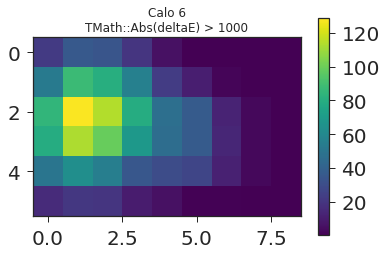

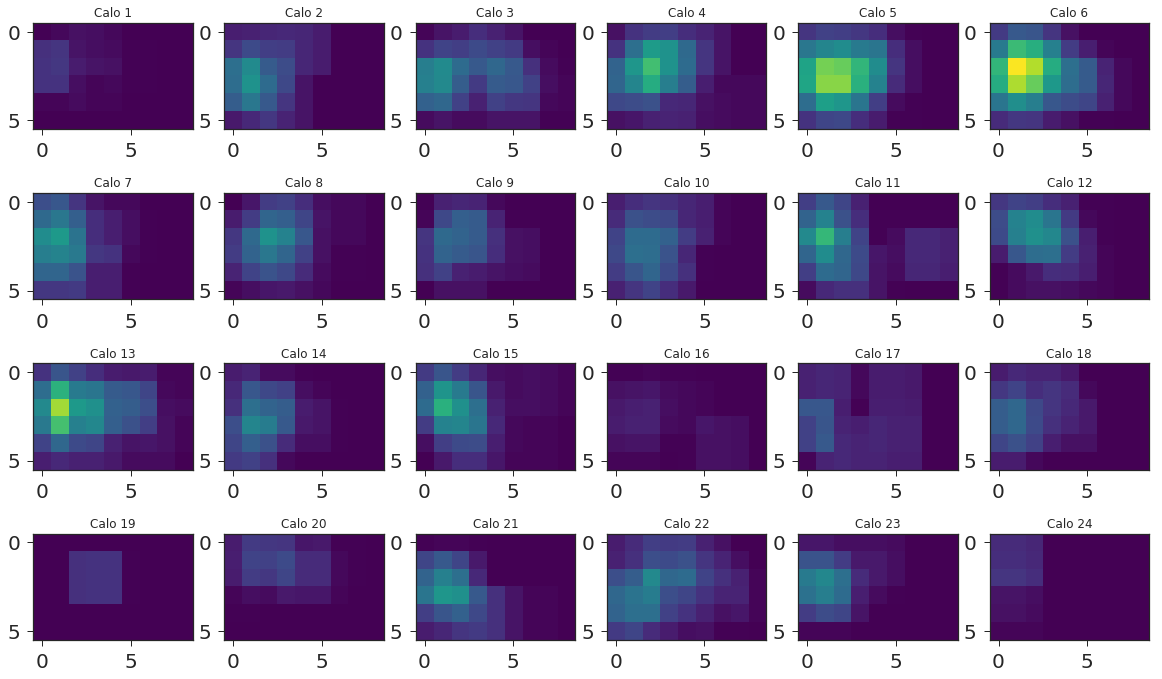

In [8]:
plt.imshow(arrangeXtals(whichCrystalsArr[maxXtalCalo-1]), vmin=0.1, vmax=maxXtal+1, cmap='viridis')
plt.title("Calo "+str(maxXtalCalo)+"\n"+cut_string)
plt.colorbar()
plt.show()

fig, ax = plt.subplots(4,6, figsize=(20,12))
for i, ding in enumerate(whichCrystalsArr):
    y = i % 6
    x = int(np.floor(i/6))
    ax[x,y].imshow(arrangeXtals( whichCrystalsArr[i] ), vmin=0.1, vmax=maxXtal+1, cmap='viridis')
    ax[x,y].set_title("Calo "+str(i+1))

    #plt.colorbar(im, cax=ax[x,y])
plt.show()